### Missing values approaches

* Check for Missing data
* Drop NA Values
* MEAN/MEDAIN Imputation
* Random sample imputation

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

### Import the CSV data as pandas dataframe

In [3]:
df = pd.read_csv(r'google_cleaned.csv')

### top 5 record

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,20,6,2018


In [4]:
#  5 sample from record

df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year
5741,Analog Clock AW-7,TOOLS,4.3,2158,3000.0,100000,Free,0.00,Everyone,Tools,2018-03-07,2.0,4.3 and up,3.00,7,3,2018
1497,Living Room Decorating Ideas,HOUSE_AND_HOME,4.0,4465,5800.0,1000000,Free,0.00,Everyone,House & Home,2015-03-06,1.7,3.0 and up,5.80,6,3,2015
3641,METEO FRANCE,WEATHER,3.9,100994,54000.0,5000000,Free,0.00,Everyone,Weather,2018-07-13,5.9.7,4.1 and up,54.00,13,7,2018
2254,EMT Review Plus,MEDICAL,4.5,199,1800.0,10000,Paid,11.99,Everyone,Medical,2018-06-27,3.0.5,4.4W and up,1.80,27,6,2018
6737,King of B.S.,FAMILY,4.0,4,840.0,100,Free,0.00,Everyone,Education,2014-06-09,1.0.1,4.0.3 and up,0.84,9,6,2014


### checking missing values

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
size              1695
day                  0
month                0
year                 0
dtype: int64

In [6]:
df.isnull().sum().sort_values(ascending = False)

Size              1695
size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Last Updated         0
month                0
day                  0
Content Rating       0
Genres               0
Category             0
Price                0
Installs             0
Reviews              0
year                 0
dtype: int64

In [7]:
df.shape

(10839, 17)

In [8]:
df.shape[0]

10839

In [11]:
(1695/10839)*100

15.637973982839744

In [4]:
null_df = pd.DataFrame({'Null Values' : df.isnull().sum().sort_values(ascending = False), "percentage Null Values" : (df.isnull().sum().sort_values(ascending=False))/(df.shape[0])*100})

In [10]:
null_df

,Null Values,percentage Null Values
Size,1695,15.637974
size,1695,15.637974
Rating,1474,13.599041
Current Ver,8,0.073808
Android Ver,2,0.018452
Type,1,0.009226
App,0,0.000000
Last Updated,0,0.000000
month,0,0.000000
day,0,0.000000


### plotting the null value counts

In [5]:
null_count = df.isnull().sum().sort_values(ascending=False)/len(df)

In [17]:
null_count

Size              0.156380
size              0.156380
Rating            0.135990
Current Ver       0.000738
Android Ver       0.000185
Type              0.000092
App               0.000000
Last Updated      0.000000
month             0.000000
day               0.000000
Content Rating    0.000000
Genres            0.000000
Category          0.000000
Price             0.000000
Installs          0.000000
Reviews           0.000000
year              0.000000
dtype: float64

In [19]:
len(null_count)

17

In [20]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
np.arange(len(null_count))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [14]:
null_count.index

Index(['Size', 'size', 'Rating', 'Current Ver', 'Android Ver', 'Type', 'App',
       'Last Updated', 'month', 'day', 'Content Rating', 'Genres', 'Category',
       'Price', 'Installs', 'Reviews', 'year'],
      dtype='object')

In [16]:
np.arange(len(null_count))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

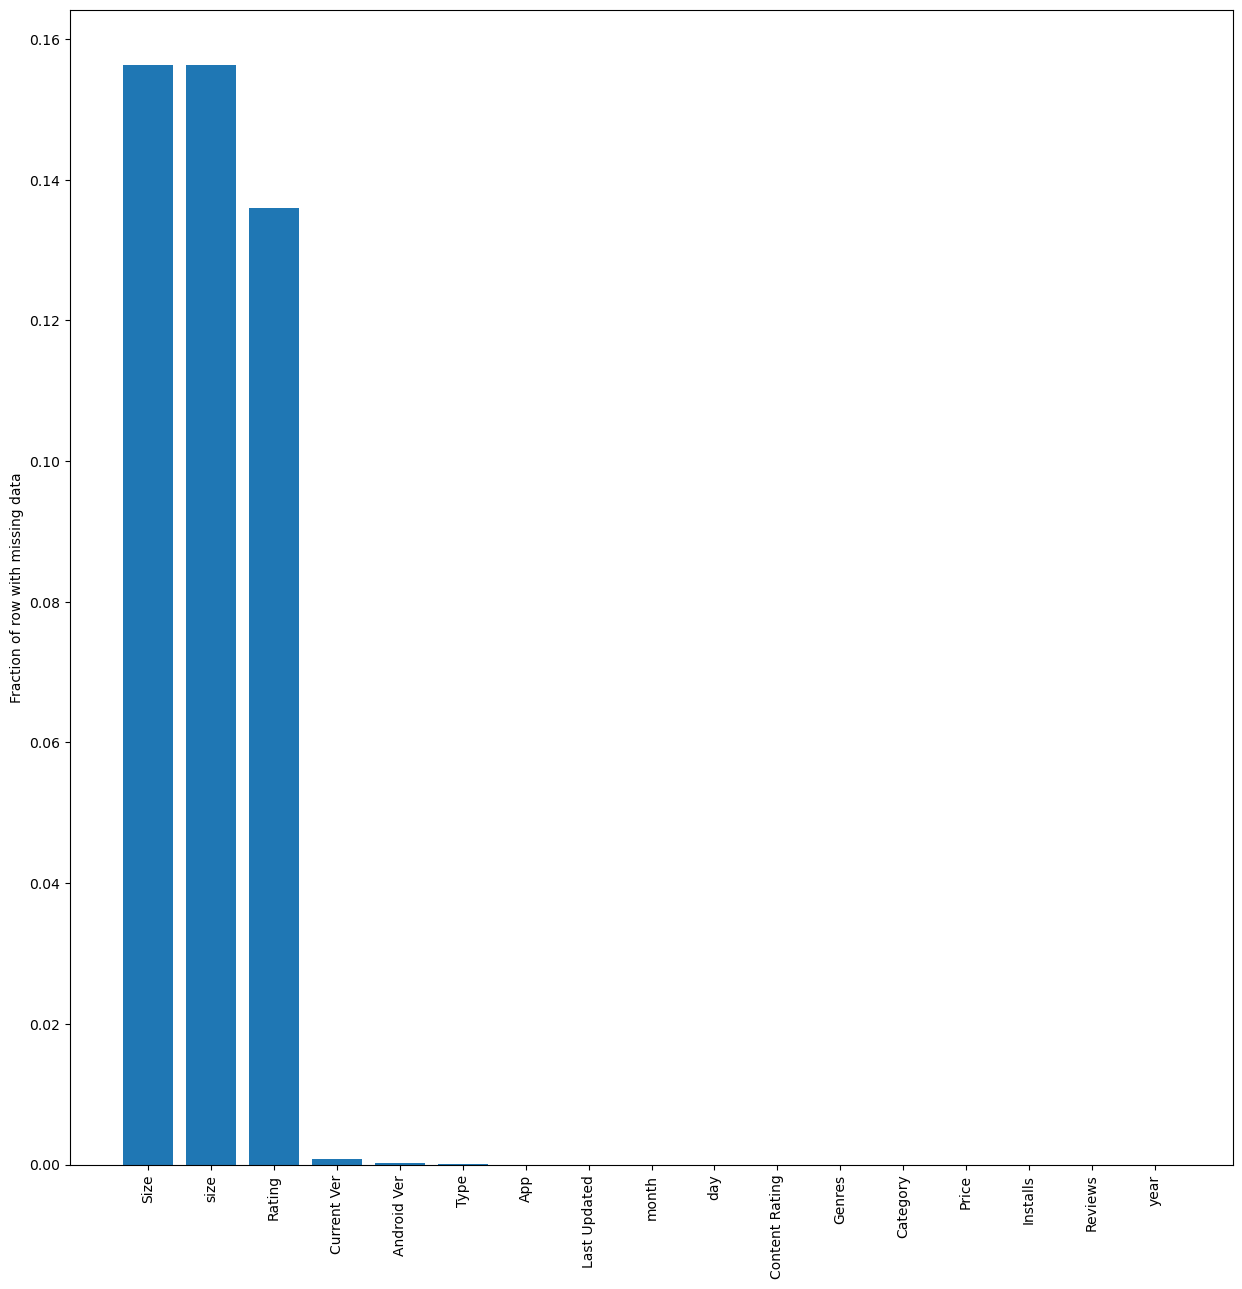

In [6]:
null_count = df.isnull().sum().sort_values(ascending = False)/len(df)
plt.figure(figsize = (15,15))
plt.xticks(np.arange(len(null_count)), null_count.index, rotation = 90)
plt.ylabel('Fraction of row with missing data')
plt.bar(np.arange(len(null_count)),null_count)
plt.show()

### Drop null values

In [18]:
# this is best practice to create a copy of the data

df_copy = df.copy()

In [26]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,53.0,25,7,2017
10835,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,3.6,6,7,2018
10836,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,9.5,20,1,2017
10837,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,NaN,19,1,2015


In [19]:
cols = [i for i in df_copy.columns if df_copy[i].isnull().mean()*100]
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver', 'size']

In [28]:
df_copy['size'].isnull().sum()

1695

In [29]:
df_copy['Size'].isnull().mean()*100

15.637973982839744

In [32]:
df_copy['Price'].isnull().mean()*100

0.0

### Dropping missing Values
    

In [34]:
df.shape

(10839, 17)

In [20]:
drop_df = df_copy[cols].dropna()
drop_df

,Rating,Size,Type,Current Ver,Android Ver,size
0,4.1,19000.0,Free,1.0.0,4.0.3 and up,19.000
1,3.9,14000.0,Free,2.0.0,4.0.3 and up,14.000
2,4.7,8700.0,Free,1.2.4,4.0.3 and up,8.700
3,4.5,25000.0,Free,Varies with device,4.2 and up,25.000
4,4.3,2800.0,Free,1.1,4.4 and up,2.800
...,...,...,...,...,...,...
10831,4.8,619.0,Free,0.8,2.2 and up,0.619
10832,4.0,2600.0,Free,1.0.0,4.1 and up,2.600
10834,4.5,53000.0,Free,1.48,4.1 and up,53.000
10835,5.0,3600.0,Free,1.0,4.1 and up,3.600


In [36]:
df_copy.shape

(10839, 17)

In [37]:
drop_df.shape

(7722, 6)

<Figure size 640x480 with 0 Axes>

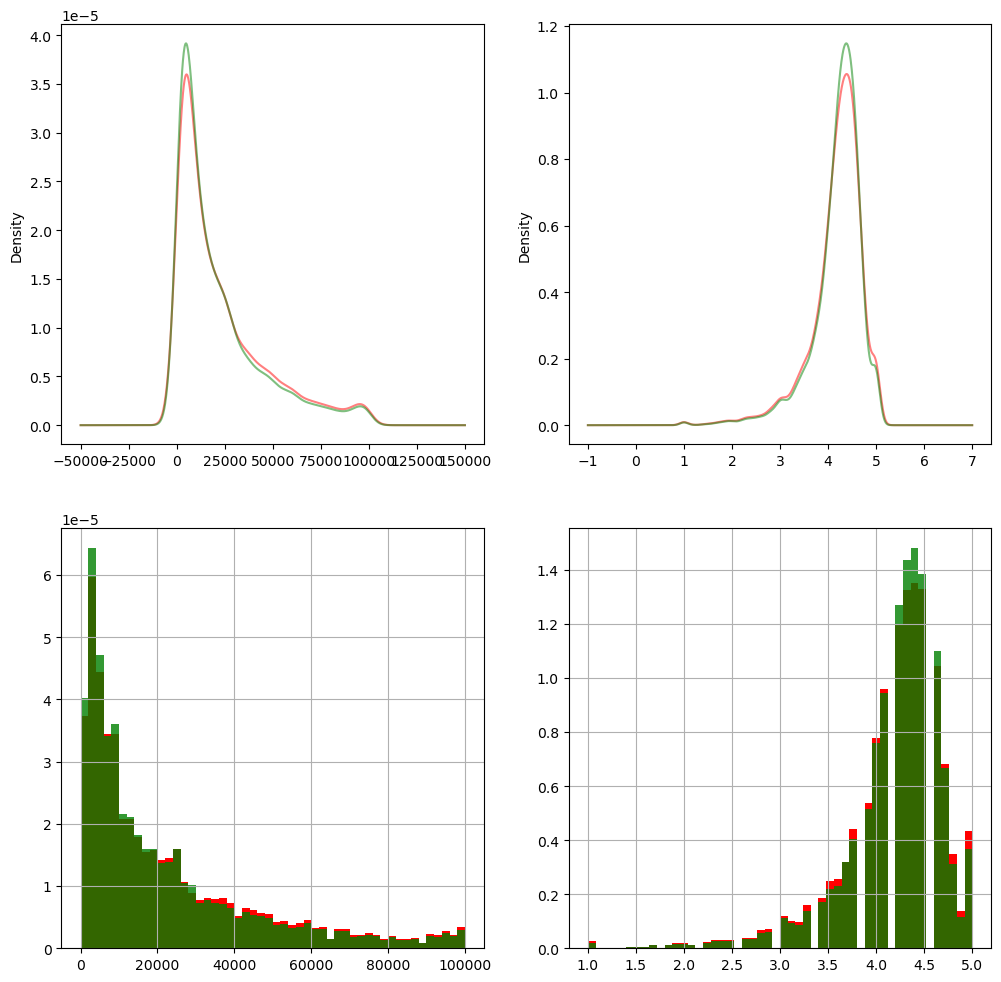

In [22]:
fig = plt.figure()

fig,axs = plt.subplots(2,2, figsize = (15,7))

drop_df['Size'].plot.density(color = 'red', ax = axs[0,0],alpha =0.5, label = 'Size')
df_copy['Size'].plot.density(color = 'green', ax=axs[0,0], alpha =0.5, label = 'Size')
drop_df['Rating'].plot.density(color = 'red', ax = axs[0,1], alpha = 0.5, label = 'Rating')
df_copy['Rating'].plot.density(color = 'green', ax=axs[0,1], alpha =0.5, label = 'Rating')
drop_df['Size'].hist(bins=50, ax=axs[1,0], density = True, figsize=(12,12), color='red')
df_copy['Size'].hist(bins=50, ax=axs[1,0], density = True, figsize=(12,12), color='green', alpha=0.8)
drop_df['Rating'].hist(bins=50, ax=axs[1,1], density =True, figsize=(12,12), color='red')
df_copy['Rating'].hist(bins=50, ax=axs[1,1], density =True, figsize=(12,12), color="green", alpha=0.8)

plt.show()

#### Insights
-As we can observe from above plots
- Drop NA Technique is changing our distribution pattern
- So we reject Drop NA Technique

### mean/medain imputation

In [23]:
df_copy_me = df.copy()

In [25]:
df_copy_me[df_copy_me.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_copy_me[df_copy_me['Size'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up,NaN,14,7,2018
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device,NaN,30,7,2018
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device,NaN,30,7,2018
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,5000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device,NaN,30,7,2018
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,100000,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device,NaN,25,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10711,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,NaN,100000,Free,0.0,Everyone,Weather,2018-07-24,Varies with device,Varies with device,NaN,24,7,2018
10723,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,1000,Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up,NaN,27,9,2017
10763,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,100000,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device,NaN,23,5,2018
10824,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device,NaN,23,3,2018


In [28]:
df_copy_me['Size'].mean()

21508.437664041994

In [29]:
df_copy_me['mean_size']=df_copy_me['Size'].fillna(df_copy_me['Size'].mean())

In [30]:
df_copy_me['mean_size']=df_copy_me['Size'].fillna(df_copy_me['Size'].mean())
df_copy_me['median_Size']=df_copy_me['Size'].fillna(df_copy_me['Size'].median())
df_copy_me['mean_rating']= df_copy_me['Rating'].fillna(df_copy_me['Rating'].mean())
df_copy_me['median_rating']= df_copy_me['Rating'].fillna(df_copy_me['Rating'].median())

In [31]:
print('original Size Variance', df_copy_me['Size'].var())

original Size Variance 510602857.26221913


In [32]:
print('Size variance after mean imputation', df_copy_me['mean_size'].var())

Size variance after mean imputation 430747547.8823103


In [33]:
print('Size variance after median imputation', df_copy_me['median_Size'].var())

Size variance after median imputation 440298951.5473089


In [34]:
print('Original variance of Rating columns', df_copy_me['Rating'].var())

Original variance of Rating columns 0.2654788129978508


In [35]:
print("Rating variance after mean imputaion", df_copy_me['mean_rating'].var())

Rating variance after mean imputaion 0.22937291058423068


In [36]:
print("Rating Variance after median imputaion", df_copy_me['median_rating'].var())

Rating Variance after median imputaion 0.2307497086013317


#### Insights
- As we can observe Variance is distorted after both mean and median imputation

<Axes: ylabel='Density'>

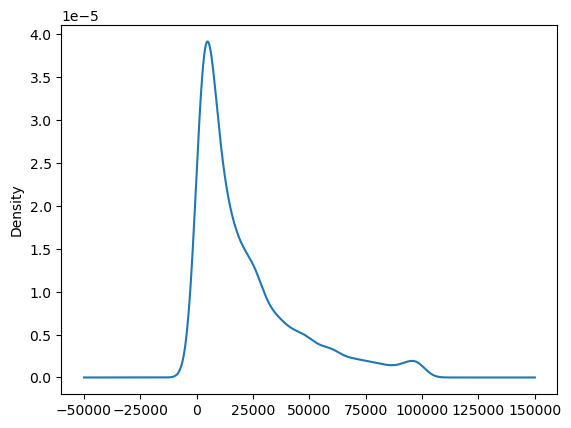

In [37]:
df_copy_me['Size'].plot.density()

<Axes: >

<Figure size 640x480 with 0 Axes>

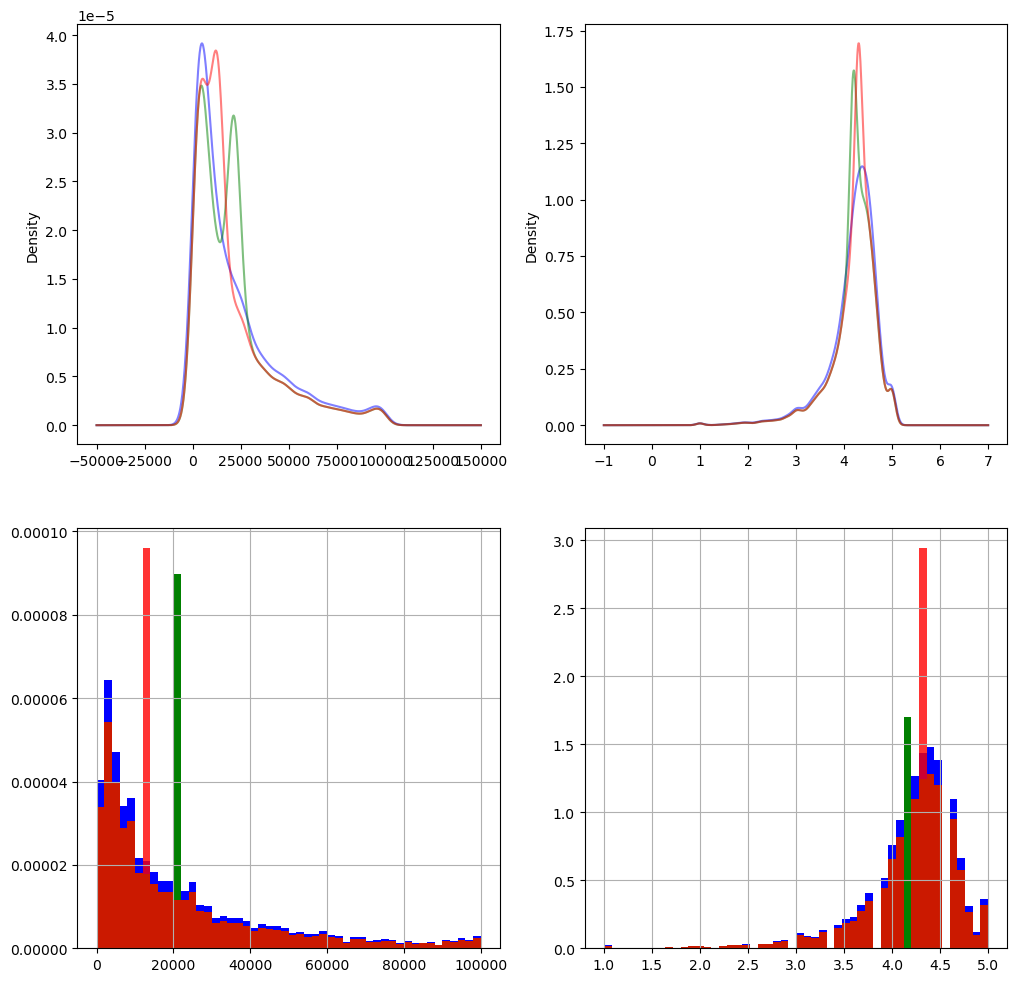

In [44]:
fig = plt.figure()

# density plot using seaborn library
fig,axs= plt.subplots(2,2, figsize=(12,7))

df_copy_me['Size'].plot.density(color = 'blue', ax=axs[0,0],alpha = 0.5, label='Size' )
df_copy_me['mean_size'].plot.density(color = 'green', ax=axs[0,0], alpha =0.5, label='mean_size')
df_copy_me['median_Size'].plot.density(color = 'red', ax=axs[0,0], alpha=0.5, label='Median_size')

df_copy_me['Rating'].plot.density(color = 'blue', ax=axs[0,1], alpha=0.5, label='Rating')
df_copy_me['mean_rating'].plot.density(color = 'green', ax=axs[0,1], alpha=0.5, label ="mean_rating")
df_copy_me['median_rating'].plot.density(color='red', ax=axs[0,1], alpha=0.5, label='median_rating')

df_copy_me['Size'].hist(bins=50,ax=axs[1,0], density =True, figsize=(12,12), color='blue')
df_copy_me['mean_size'].hist(bins=50,ax=axs[1,0], density = True, figsize=(12,12), color='green')
df_copy_me['median_Size'].hist(bins=50, ax=axs[1,0], density=True, figsize=(12,12), color='red', alpha=0.8)

df_copy_me['Rating'].hist(bins=50, ax=axs[1,1], density=True, figsize=(12,12), color='blue')
df_copy_me['mean_rating'].hist(bins=50, ax=axs[1,1], density=True, figsize=(12,12), color="green")
df_copy_me['median_rating'].hist(bins=50, ax=axs[1,1], density=True, figsize=(12,12), color='red', alpha=0.8)

#### Insights
-As we can observe from above plots
- Mean and median imputation Technique is changing our distribution pattern.
- So we will reject mean and median imputation Technique also.

### Random sample imputation

In [7]:
df_random = df.copy()

In [8]:
df_random['Size'].dropna().sample(20)

2775     18000.0
4403     59000.0
2157     18000.0
7389     10000.0
2969     15000.0
8987      5800.0
1698     49000.0
9919     34000.0
6892     27000.0
9081     26000.0
9688     73000.0
4446     22000.0
10087     3400.0
6555     11000.0
2506      4400.0
10600    21000.0
10616     3200.0
7063      3700.0
8716     20000.0
3065     21000.0
Name: Size, dtype: float64

In [9]:
df_random['Size'].isnull().sum()

1695

In [10]:
df_random[df_random['Size'].isnull()].index

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10645, 10677, 10679, 10705, 10710, 10711, 10723, 10763, 10824,
            10837],
           dtype='int64', length=1695)

In [11]:
df_random['Size'].dropna().sample(1695)

7275      3200.0
8685     12000.0
9402      3700.0
4349     82000.0
9092      9800.0
          ...   
6909     53000.0
7255      1400.0
5539     30000.0
10119      656.0
4489     21000.0
Name: Size, Length: 1695, dtype: float64

In [27]:
def random_sample_imputation(feature):
    random_sample = df_random[feature].dropna().sample(df_random[feature].isnull().sum())
    random_sample.index = df_random[df_random[feature].isnull()].index
    df_random.loc[df_random[feature].isnull(),feature]=random_sample

In [28]:
for col in df_random:
    random_sample_imputation(col)

In [30]:
print("Original size variance", df['size'].var())
print("Size variance after random imputation", df_random['size'].var())

Original size variance 510.60285726221576
Size variance after random imputation 513.9818914985867


In [31]:
print('Original size variance', df['Rating'].var())
print('Size variance after rating imputation', df_random['Rating'].var())

Original size variance 0.2654788129978508
Size variance after rating imputation 0.26588894330703694


<Axes: >

<Figure size 640x480 with 0 Axes>

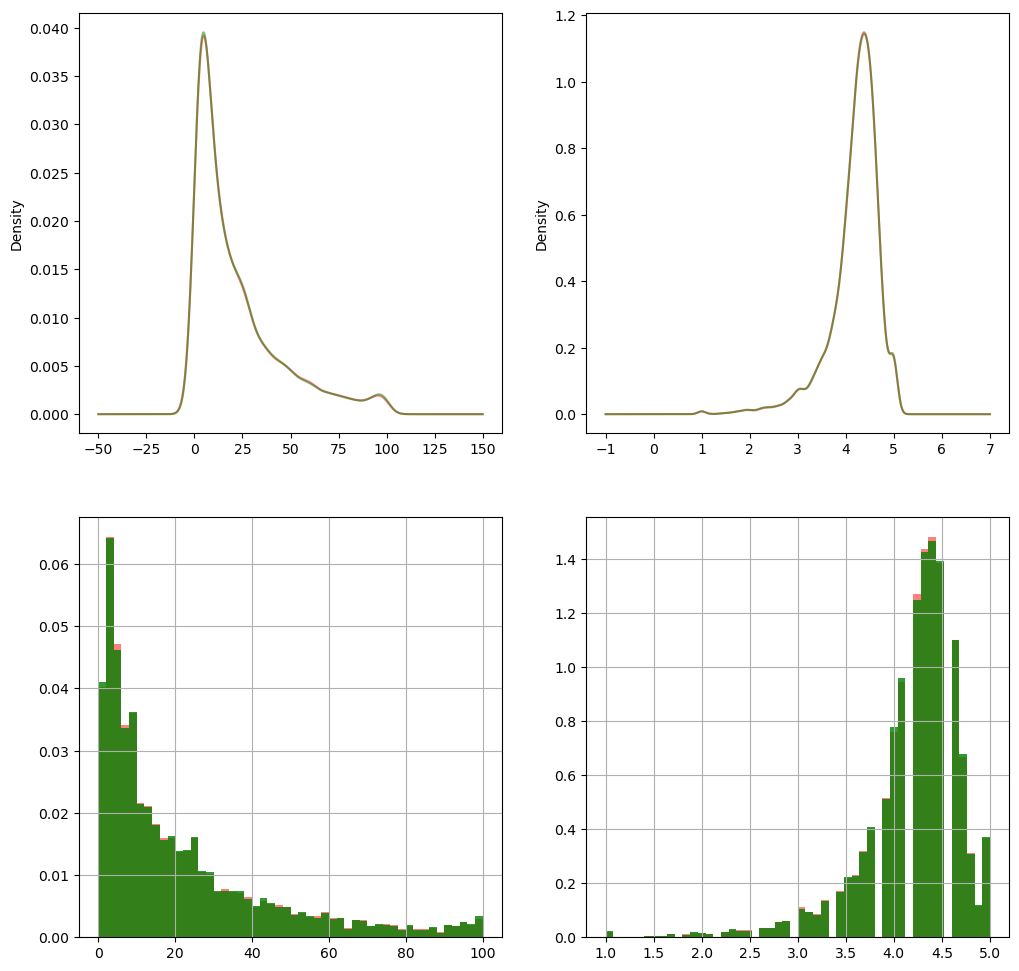

In [32]:
fig = plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2,2, figsize=(15,7))

df['size'].plot.density(color = 'red', ax=axs[0,0], alpha =0.5, label ='Size')
df_random['size'].plot.density(color = 'green', ax = axs[0,0], alpha =0.5, label ='Size')
df['Rating'].plot.density(color ='red', ax=axs[0,1], alpha=0.5, label='Rating')
df_random['Rating'].plot.density(color='green', ax=axs[0,1], alpha=0.5, label="Rating")
df['size'].hist(bins=50, ax=axs[1,0], density=True, figsize=(12,12), color="red", alpha=0.5)
df_random['size'].hist(bins=50, ax=axs[1,0], density=True, figsize=(12,12), color='green', alpha= 0.8)
df['Rating'].hist(bins=50, ax=axs[1,1], density=True, figsize=(12,12), color='red', alpha=0.5)
df_random['Rating'].hist(bins=50,ax=axs[1,1], density=True,figsize=(12,12), color='green', alpha=0.8)

In [33]:
null_df = pd.DataFrame({'Null Values':df_random.isnull().sum().sort_values(ascending = False), "Percentage Null values":(df_random.isnull().sum().sort_values(ascending=False))/(df_random.shape[0])*100})

In [34]:
null_df

,Null Values,Percentage Null values
App,0,0.0
Genres,0,0.0
month,0,0.0
day,0,0.0
size,0,0.0
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Content Rating,0,0.0
Category,0,0.0


#### Insights
-As we can observe from above plots
- Random Sample imputation Technique has no impact on distribution pattern.
- So we will accept Random Sample imputation Technique .

In [67]:
num_features=[col for col in df_random.columns if df_random[col].dtype!='O']
num_df = df_random[num_features]
num_df.head()

,Rating,Reviews,Size,Installs,Price,size,day,month,year
0,4.1,159,19000.0,10000,0.0,19.0,7,1,2018
1,3.9,967,14000.0,500000,0.0,14.0,15,1,2018
2,4.7,87510,8700.0,5000000,0.0,8.7,1,8,2018
3,4.5,215644,25000.0,50000000,0.0,25.0,8,6,2018
4,4.3,967,2800.0,100000,0.0,2.8,20,6,2018


In [35]:
df.drop(['Size'], axis=1, inplace=True)

KeyError: "['Size'] not found in axis"

In [38]:
df_random.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,20,6,2018


In [39]:
df_random.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
size              0
day               0
month             0
year              0
dtype: int64

In [42]:
df_random.to_csv('google_missing_value_imputed2.csv', index=False)

In [43]:
pd.read_csv(r'google_missing_value_imputed2.csv')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,53.0,25,7,2017
10835,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,3.6,6,7,2018
10836,Parkinson Exercices FR,MEDICAL,3.8,3,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,9.5,20,1,2017
10837,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,9200.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,11.0,19,1,2015
